In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
features = pd.read_csv('1300.csv')
features = features.sort_values(['TIME'])
features = features.reset_index()
features = features[['SPEED', 'HOUR', 'DAY_OF_WEEK', 'MONTH']]
labels = np.array(features['SPEED'])
features = features.drop('SPEED', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [4]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
for i in range(len(test_labels)):
    if (test_labels[i] == 0):
        test_labels[i] = 1

In [5]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (28521, 3)
Training Labels Shape: (28521,)
Testing Features Shape: (9507, 3)
Testing Labels Shape: (9507,)


In [6]:
baseline_errors = abs(16.63 - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  3.48


In [7]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [8]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.0 degrees.


In [9]:
mape = 100 * (errors / test_labels)
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[338.45112746  16.71287418  15.3598243  ...  13.89507612  50.57476494
   4.65802011]
Accuracy: 68.83 %.


In [10]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree1300.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree1300.dot')
# Write graph to a png file
graph.write_png('tree1300.png')

In [11]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree1300.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree1300.dot')
graph.write_png('small_tree1300.png');

In [12]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: HOUR                 Importance: 0.5
Variable: DAY_OF_WEEK          Importance: 0.27
Variable: MONTH                Importance: 0.23


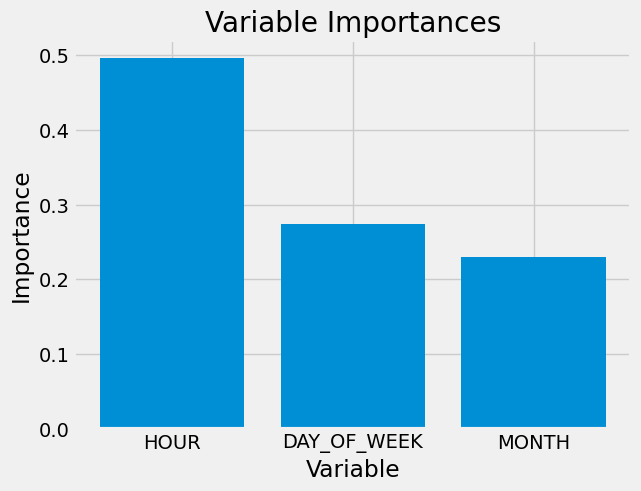

In [13]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='horizontal')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Text(0.5, 1.0, 'Prediction vs Actual for first 100 test points')

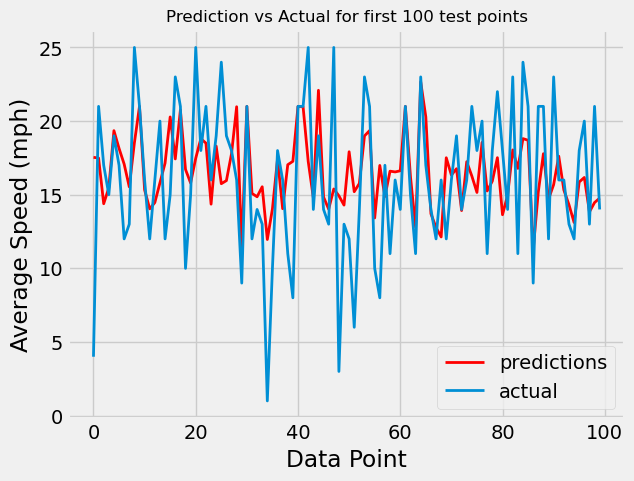

In [14]:
new_labels = test_labels[0:100]
new_predictions = predictions[0:100]
x = np.arange(100)
plt.plot(new_predictions, c = 'red', linewidth = 2, label = "predictions")
plt.plot(new_labels, linewidth = 2, label = "actual")
plt.xlabel("Data Point")
plt.ylabel("Average Speed (mph)")
plt.legend(loc = "lower right")
plt.title("Prediction vs Actual for first 100 test points", size = "12")